In [30]:
!pip install yfinance

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [32]:
data1=yf.download('TSLA',start='2015-01-23', end='2023-01-01')
data1.shape

[*********************100%%**********************]  1 of 1 completed


(2000, 6)

In [33]:
data1 = data1['Close'].to_frame()

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [36]:
data1.shape

(2000, 1)

In [37]:
training_size = int(len(data1)*0.75)

In [38]:
train_data,test_data = data1[0:training_size,:],data1[training_size:len(data1),:1]

In [39]:
# converting the array values into a dataset matrix : 
def create_dataset(dataset, time_step = 1):
    dataX , dataY = [], []
    for i in range(len(dataset) - time_step - 1 ):
        a = dataset[i:(i + time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [40]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)

X_test, y_test = create_dataset(test_data, time_step)

In [41]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
model=Sequential()

In [43]:
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0045 - val_loss: 0.0068
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6555e-04 - val_loss: 0.0062
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.2326e-04 - val_loss: 0.0109
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.1147e-04 - val_loss: 0.0058
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.2130e-04 - val_loss: 0.0063
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.6586e-04 - val_loss: 0.0055
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.1110e-04 - val_loss: 0.0104
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.6172e-04 - val_loss: 0.0060
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.9147e-04 - val_loss: 0.0067
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.1050e-04 - val_loss: 0.0108
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8874e-04 - val_loss: 0.0036
Epoch 12/100

In [46]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [47]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [48]:
# shifting train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict

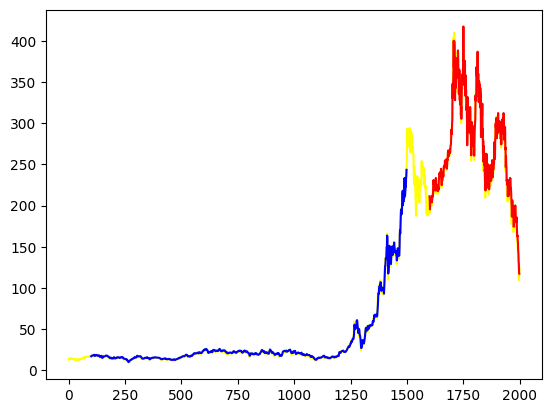

In [49]:
# ploting baseline and predictions
plt.plot(scaler.inverse_transform(data1) , color = "yellow")
plt.plot(trainPredictPlot , color = "blue") # train predict data
plt.plot(testPredictPlot  , color = "red") # test predict data
plt.show()

In [50]:
x_input = test_data[400:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input = list(x_input)


In [52]:
temp_input = temp_input[0].tolist()
len(temp_input)

100

In [53]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.30071672797203064], [0.31333571672439575], [0.3249923884868622], [0.33520492911338806], [0.3442988395690918], [0.3527798652648926], [0.3611352741718292], [0.369709849357605], [0.37864890694618225], [0.3879058063030243], [0.3972928524017334], [0.4065518081188202], [0.41542404890060425], [0.4237041175365448], [0.43127012252807617], [0.43808865547180176], [0.44419974088668823], [0.449689120054245], [0.45465970039367676], [0.4592076539993286], [0.46341007947921753], [0.4673214256763458], [0.47097843885421753], [0.4744085669517517], [0.4776379466056824], [0.48069629073143005], [0.4836190938949585], [0.48644599318504333], [0.4892180263996124], [0.4919738471508026]]


In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

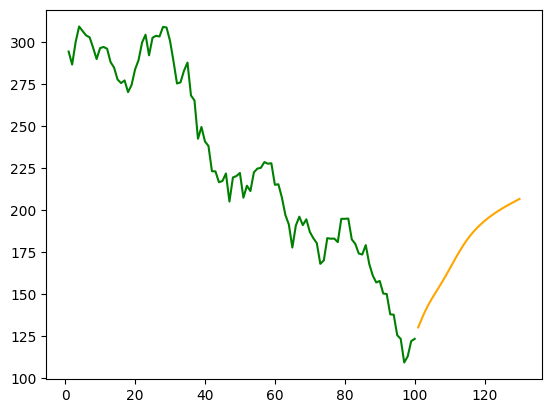

In [55]:
plt.plot(day_new,scaler.inverse_transform(data1[1900:]) , color="green")
plt.plot(day_pred,scaler.inverse_transform(lst_output) , color = "orange")

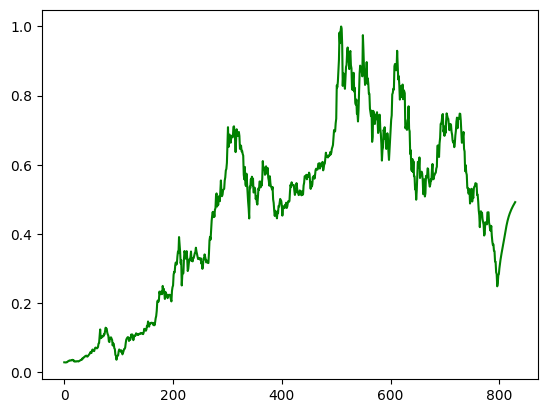

In [56]:
data3 = data1.tolist()
data3.extend(lst_output)
plt.plot(data3[1200:] , color = "green")